## Download GuitarSet dataset (optional step, if you does not have **guitarset.zip**)

In [17]:
import wget
import os

def download_file(URL, destination_name):
    isGuitarSetZipPresent = os.path.exists(destination_name)
    if not isGuitarSetZipPresent:
        print("Started downloading ", destination_name)
        response = wget.download(URL, destination_name)
        print("Finished")
    else:
        print("file already present: ", destination_name)

data_URL = "https://zenodo.org/record/3371780/files/audio_hex-pickup_original.zip"
download_file(data_URL, "guitarset_data.zip")

label_URL = "https://zenodo.org/record/3371780/files/annotation.zip"
download_file(label_URL, "guitarset_label.zip")

file already present:  guitarset_data.zip
file already present:  guitarset_label.zip


## Unzip **guitarset.zip** to **GuitarSet** directory

In [18]:
import zipfile

with zipfile.ZipFile("guitarset_data.zip", 'r') as zip_ref_data:
    with zipfile.ZipFile("guitarset_label.zip", 'r') as zip_ref_label:
        isExist = os.path.exists("GuitarSet_extracted")
        if not isExist:
            os.makedirs("GuitarSet_extracted")
            os.makedirs("GuitarSet_extracted/audio")
            os.makedirs("GuitarSet_extracted/labels")
            print("The new directory is created!")
            zip_ref_data.extractall("GuitarSet_extracted/audio")
            zip_ref_label.extractall("GuitarSet_extracted/labels")
            print("Finished unpack")
        else:
            print("GuitarSet path already exists! Nothing is performed!")


GuitarSet path already exists! Nothing is performed!


## Setting paths

In [19]:
#transform GuitarSet dataset to preprocessed guitarset directory
gs_path = "GuitarSet_extracted"
destination_path = "guitarset"
os.mkdir(destination_path)

## Train-test split

In [20]:
import jams
import os
import matplotlib.pyplot as plt
import glob
import os

# All files and directories ending with .txt with depth of 2 folders, ignoring names beginning with a dot:
list_of_recordings = glob.glob(f'{gs_path}/audio/*.wav')
list_of_labels = glob.glob(f'{gs_path}/labels/*.jams')
list_of_recordings.sort()
list_of_labels.sort()
print()
for i, element in enumerate(list_of_recordings):
    element_name = os.path.basename(element)[:-8]
    label_name = os.path.basename(list_of_labels[i])[:-5]
    if(element_name != label_name):
        raise Exception(f"problem with names! {element_name} != {label_name}")

import pandas as pd
from sklearn.model_selection import train_test_split

# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(list_of_recordings,list_of_labels, train_size=0.8, random_state=33)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

# print("X_train: ", X_train)
# print("Y_train: ", y_train)
# print("X_valid", X_valid)
# print("y_valid", y_valid)
# print("X_test", X_test)
# print("y_test", y_test)

# for filename in list_of_files:
#     jam = jams.load(os.path.join(gs_path+anno_dir, filename))
#     prettyMidiRepresentation = itp.jams_to_midi(jam)
#     prettyMidiRepresentation.write(filename+".mid")

## create directories for test val and train and copy there splitted files

In [21]:
# make new directories
from pathlib import Path
import shutil

def copy_to_exact_directory(X_dir, y_dir, dir="train"):
    Path(destination_path+"/" + dir + "/audio").mkdir(parents=True, exist_ok=True)
    Path(destination_path+"/" + dir + "/labels").mkdir(parents=True, exist_ok=True)

    for X, y in zip(X_dir, y_dir):
        shutil.copy(X, destination_path+"/" + dir + "/audio")
        shutil.copy(y, destination_path+"/" + dir + "/labels")

copy_to_exact_directory(X_test, y_test, "test")
copy_to_exact_directory(X_valid, y_valid, "val")
copy_to_exact_directory(X_train, y_train, "train")

## preprocessing all jams file (converting them to midi)

In [22]:
#preprocess given jams files
import interpreter as itp

def jams_to_midi_conversion(label_directory):
    list_of_labels = glob.glob(f'{label_directory}/labels/*.jams')
    for filename in list_of_labels:
        jam = jams.load(filename)
        prettyMidiRepresentation = itp.jams_to_midi(jam)
        prettyMidiRepresentation.write(filename+".mid")

jams_to_midi_conversion(destination_path+"/train/")
jams_to_midi_conversion(destination_path+"/val/")
jams_to_midi_conversion(destination_path+"/test/")

## one example of preprocessed jam

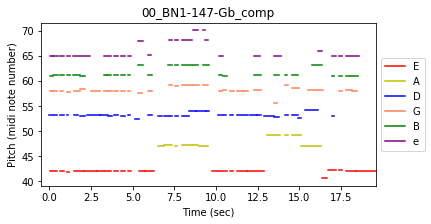

In [23]:
#show last example
jam = jams.load(destination_path+"/train/labels/00_BN1-147-Gb_comp.jams")
instructed_chords = jam.search(namespace='chord')[0]
performed_chords = jam.search(namespace='chord')[1]

itp.visualize_jams_note(jam)
plt.show()